In [345]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from matplotlib_venn import venn2


from packages.utils import standard_OHE

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



In [346]:
# Importazione dataset

data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [347]:
for i in list(data.columns):
    print(i)




Bankrupt?
 ROA(C) before interest and depreciation before interest
 ROA(A) before interest and % after tax
 ROA(B) before interest and depreciation after tax
 Operating Gross Margin
 Realized Sales Gross Margin
 Operating Profit Rate
 Pre-tax net Interest Rate
 After-tax net Interest Rate
 Non-industry income and expenditure/revenue
 Continuous interest rate (after tax)
 Operating Expense Rate
 Research and development expense rate
 Cash flow rate
 Interest-bearing debt interest rate
 Tax rate (A)
 Net Value Per Share (B)
 Net Value Per Share (A)
 Net Value Per Share (C)
 Persistent EPS in the Last Four Seasons
 Cash Flow Per Share
 Revenue Per Share (Yuan ¥)
 Operating Profit Per Share (Yuan ¥)
 Per Share Net profit before tax (Yuan ¥)
 Realized Sales Gross Profit Growth Rate
 Operating Profit Growth Rate
 After-tax Net Profit Growth Rate
 Regular Net Profit Growth Rate
 Continuous Net Profit Growth Rate
 Total Asset Growth Rate
 Net Value Growth Rate
 Total Asset Return Growth Rate R

In [348]:
#Modifica nome delle colonne
data.rename(columns={"Bankrupt?" : "Bancarotta",
                     " ROA(C) before interest and depreciation before interest" : "ROA(C) prima degli interessi e della svalutazione",
                     " ROA(A) before interest and % after tax" :"ROA(A) prima degli interessi e dopo le tasse",
                     " ROA(B) before interest and depreciation after tax" : "ROA(B) al lordo di interessi e ammortamenti dopo le imposte"," Operating Gross Margin" : "Margine Lordo Operativo"," Realized Sales Gross Margin" : "Margine Lordo sulle Vendite Effettive"," Operating Profit Rate" : "Margine di Profitto Operativo"," Pre-tax net Interest Rate" : "Aliquota di interesse netta ante imposte"," After-tax net Interest Rate" : "Tasso di interesse netto dopo le tasse"," Non-industry income and expenditure/revenue" : "Entrate e spese/redditività non legate all'industria"," Continuous interest rate (after tax)" : "Tasso di interesse continuo (al netto delle imposte)"," Operating Expense Rate" : "Tasso di Spesa Operativa", " Research and development expense rate" : "Aliquota delle spese di ricerca e sviluppo", " Cash flow rate" : "Tasso di flusso di cassa", " Interest-bearing debt interest rate" : "Aliquota degli interessi sul debito", " Tax rate (A)" : "Aliquota fiscale (A)", " Net Value Per Share (B)" : "Valore Netto per Azione (B)", " Net Value Per Share (A)" : "Valore Netto per Azione (A)", " Net Value Per Share (C)" : "Valore Netto per Azione (C)", " Persistent EPS in the Last Four Seasons" : "EPS persistente nelle ultime quattro stagioni", " Cash Flow Per Share" : "Flusso di cassa per azione", " Revenue Per Share (Yuan ¥)" : "Entrate per azione (Yuan ¥)", " Operating Profit Per Share (Yuan ¥)" : "Profitto Operativo per Azione (Yuan ¥)"," Per Share Net profit before tax (Yuan ¥)" : "Profitto netto per azione prima delle tasse (Yuan ¥)", " Realized Sales Gross Profit Growth Rate" : "Tasso di crescita del margine lordo delle vendite", " Operating Profit Growth Rate" : "Tasso di crescita dell'utile operativo", " After-tax Net Profit Growth Rate" : "Tasso di crescita del profitto netto dopo le tasse", " Regular Net Profit Growth Rate" : "Aliquota crescita regolare del profitto netto", " Continuous Net Profit Growth Rate" : "Tasso di crescita continua del profitto netto", " Total Asset Growth Rate" : "Tasso di crescita totale degli asset", " Net Value Growth Rate" : "Tasso crescita valore netto"," Total Asset Return Growth Rate Ratio" : "Tasso di crescita del rendimento totale degli asset "," Cash Reinvestment %" : "Percentuale di reinvestimento del contante", " Current Ratio" : "Rapporto Corrente", " Quick Ratio" : "Rapporto Rapido", " Interest Expense Ratio" : "Rapporto Spese Interesse", " Total debt/Total net worth" : "Debito totale/ Patrimonio netto totale", " Debt ratio %" : "Rapporto debito %", " Net worth/Assets" : "Patrimonio netto/Attività", " Long-term fund suitability ratio (A)" : "Livello di idoneità dei fondi a lungo termine (A)", " Borrowing dependency" : "Indebitamento da prestiti", " Contingent liabilities/Net worth" : "Crediti in sospeso/Patrimonio netto", " Operating profit/Paid-in capital" : "Profitto operativo su capitale versato", " Net profit before tax/Paid-in capital" : "Profitto netto prima delle imposte / Capitale sociale versato", " Inventory and accounts receivable/Net value" : "Inventario e crediti commerciali/Valore netto", " Total Asset Turnover" : "Rotazione totale degli asset", " Accounts Receivable Turnover" : "Rotazione dei crediti", " Average Collection Days" : "Giorni medi di incasso", " Inventory Turnover Rate (times)" : "Rotazione dell'inventario (volte)", " Fixed Assets Turnover Frequency" : "Frequenza del turnover degli asset fissi", " Net Worth Turnover Rate (times)" :  "Net Worth Turnover Rate (times)", " Revenue per person" : "Entrate per persona", " Operating profit per person" : "Profitto operativo per persona", " Allocation rate per person" : "Tariffa di allocazione per persona", " Working Capital to Total Assets" : "Capitale circolante su attivo totale", " Quick Assets/Total Assets" : "Attività rapide/Attività totali", " Current Assets/Total Assets" : "Attività correnti/Attività totali", " Cash/Total Assets" : "Cassa/Attività Totali", " Quick Assets/Current Liability" : "Attività rapide su passività corrente", " Cash/Current Liability" : "Cassa/Passività correnti", " Current Liability to Assets" : "Passività correnti su attività", " Operating Funds to Liability" : "Rapporto tra Fondi Operativi e Passività", " Inventory/Working Capital" : "Inventario/Capitale circolante", " Inventory/Current Liability" : "Inventario/Passività corrente", " Current Liabilities/Liability" : "Correnti Passività/Passivo", " Working Capital/Equity" : "Capitale circolante/patrimonio netto", " Current Liabilities/Equity" : "Passività correnti su patrimonio netto", " Long-term Liability to Current Assets" : "Debito a lungo termine su attività correnti", " Retained Earnings to Total Assets" : "Riserve utili su attivo totale", " Total income/Total expense" : "Reddito totale/Spese totali", " Total expense/Assets" : "Spese totali/Attività", " Current Asset Turnover Rate" : "Indice di Rotazione dell'Attivo Corrente", " Quick Asset Turnover Rate" : "Velocità di rotazione rapida degli asset", " Working capitcal Turnover Rate" : "Rapporto di rotazione del capitale circolante", " Cash Turnover Rate" : "Velocità di Rotazione del Contante", " Cash Flow to Sales" : "Flusso di cassa su vendite", " Fixed Assets to Assets" : "Attivi fissi su attivi", " Current Liability to Liability" : "Rapporto attuale di passività", " Current Liability to Equity" : "Passività corrente su patrimonio netto", " Equity to Long-term Liability" : "Rap. Patrimonio a Passività a Lungo Term.", " Cash Flow to Total Assets" : "Cash Flow su Attività Totali"," Cash Flow to Liability" : "Flusso di cassa sulle passività", " CFO to Assets" : "Rapporto CFO su Attività", " Cash Flow to Equity" : "Flusso di cassa verso il patrimonio netto", " Current Liability to Current Assets" : "Rapporto Passività Correnti su Attività Correnti", " Liability-Assets Flag" : "Indicatore Passività-Attività", " Net Income to Total Assets" : "Redditività sull'Attivo Totale (NITA)", " Total assets to GNP price" : "Totale attività rispetto al prezzo PNL", " No-credit Interval" : "Intervallo senza credito", " Gross Profit to Sales" : "Utile lordo sulle vendite"," Net Income to Stockholder's Equity" : "Utile netto/patrimonio netto", " Liability to Equity" : "Responsabilità verso il patrimonio netto", " Degree of Financial Leverage (DFL)" : "Grado di leva finanziaria (DFL)", " Interest Coverage Ratio (Interest expense to EBIT)" : "Rapp. di copertura degli interessi (interessi passivi/EBIT)", " Net Income Flag" : "Indicatore di Reddito Netto", " Equity to Liability" : "Capitale proprio/Passività"}, inplace = True)


In [349]:
for i in list(data.columns):
    print(i)


Bancarotta
ROA(C) prima degli interessi e della svalutazione
ROA(A) prima degli interessi e dopo le tasse
ROA(B) al lordo di interessi e ammortamenti dopo le imposte
Margine Lordo Operativo
Margine Lordo sulle Vendite Effettive
Margine di Profitto Operativo
Aliquota di interesse netta ante imposte
Tasso di interesse netto dopo le tasse
Entrate e spese/redditività non legate all'industria
Tasso di interesse continuo (al netto delle imposte)
Tasso di Spesa Operativa
Aliquota delle spese di ricerca e sviluppo
Tasso di flusso di cassa
Aliquota degli interessi sul debito
Aliquota fiscale (A)
Valore Netto per Azione (B)
Valore Netto per Azione (A)
Valore Netto per Azione (C)
EPS persistente nelle ultime quattro stagioni
Flusso di cassa per azione
Entrate per azione (Yuan ¥)
Profitto Operativo per Azione (Yuan ¥)
Profitto netto per azione prima delle tasse (Yuan ¥)
Tasso di crescita del margine lordo delle vendite
Tasso di crescita dell'utile operativo
Tasso di crescita del profitto netto dop

In [350]:
manual_selected_features = [
    
    'ROA(B) al lordo di interessi e ammortamenti dopo le imposte',
    'Margine Lordo Operativo',
    'Tasso di interesse netto dopo le tasse',
    'Tasso di Spesa Operativa',
    'Aliquota delle spese di ricerca e sviluppo',
    'Tasso di flusso di cassa',
    'Aliquota degli interessi sul debito',
    'Aliquota fiscale (A)',
    'Valore Netto per Azione (A)',
    'EPS persistente nelle ultime quattro stagioni',
    'Flusso di cassa per azione',
    "Tasso di crescita dell'utile operativo",
    "Tasso crescita valore netto",
    "Percentuale di reinvestimento del contante",
    "Debito totale/ Patrimonio netto totale",
    "Rapporto debito %",
    "Patrimonio netto/Attività",
    "Livello di idoneità dei fondi a lungo termine (A)",
    "Indebitamento da prestiti",
    "Crediti in sospeso/Patrimonio netto",
    "Profitto operativo su capitale versato",
    "Inventario e crediti commerciali/Valore netto",
    "Rotazione totale degli asset",
    "Profitto operativo per persona",
    "Passività correnti su attività",
    "Correnti Passività/Passivo",
    "Capitale circolante/patrimonio netto",
    "Debito a lungo termine su attività correnti",
    "Riserve utili su attivo totale",
    "Indice di Rotazione dell'Attivo Corrente",
    "Passività corrente su patrimonio netto",
    "Redditività sull'Attivo Totale (NITA)",
    "Grado di leva finanziaria (DFL)",
    "Capitale proprio/Passività",
    'Bancarotta'
]


In [351]:
# Dimensione dataset
df = pd.DataFrame(data[manual_selected_features])
print("La dimensione del dataset è: ", df.shape)


La dimensione del dataset è:  (6819, 35)


In [352]:
# Valori Mancanti
missing_values_count = df.isnull().sum()
print(missing_values_count)


ROA(B) al lordo di interessi e ammortamenti dopo le imposte    0
Margine Lordo Operativo                                        0
Tasso di interesse netto dopo le tasse                         0
Tasso di Spesa Operativa                                       0
Aliquota delle spese di ricerca e sviluppo                     0
Tasso di flusso di cassa                                       0
Aliquota degli interessi sul debito                            0
Aliquota fiscale (A)                                           0
Valore Netto per Azione (A)                                    0
EPS persistente nelle ultime quattro stagioni                  0
Flusso di cassa per azione                                     0
Tasso di crescita dell'utile operativo                         0
Tasso crescita valore netto                                    0
Percentuale di reinvestimento del contante                     0
Debito totale/ Patrimonio netto totale                         0
Rapporto debito %        

In [353]:
# Valori Duplicati
Duplicates = df.duplicated().sum()
print("Numero di duplicati: ", Duplicates)


Numero di duplicati:  0


In [354]:
# Tipologia dati
print(df.dtypes)


ROA(B) al lordo di interessi e ammortamenti dopo le imposte    float64
Margine Lordo Operativo                                        float64
Tasso di interesse netto dopo le tasse                         float64
Tasso di Spesa Operativa                                       float64
Aliquota delle spese di ricerca e sviluppo                     float64
Tasso di flusso di cassa                                       float64
Aliquota degli interessi sul debito                            float64
Aliquota fiscale (A)                                           float64
Valore Netto per Azione (A)                                    float64
EPS persistente nelle ultime quattro stagioni                  float64
Flusso di cassa per azione                                     float64
Tasso di crescita dell'utile operativo                         float64
Tasso crescita valore netto                                    float64
Percentuale di reinvestimento del contante                     float64
Debito

In [355]:
# variabili dummy
dummy_cols = data.columns[data.nunique() == 2]
data_dummy = data[dummy_cols]
print(data_dummy)


      Bancarotta  Indicatore Passività-Attività
0              1                              0
1              1                              0
2              1                              0
3              1                              0
4              1                              0
...          ...                            ...
6814           0                              0
6815           0                              0
6816           0                              0
6817           0                              0
6818           0                              0

[6819 rows x 2 columns]


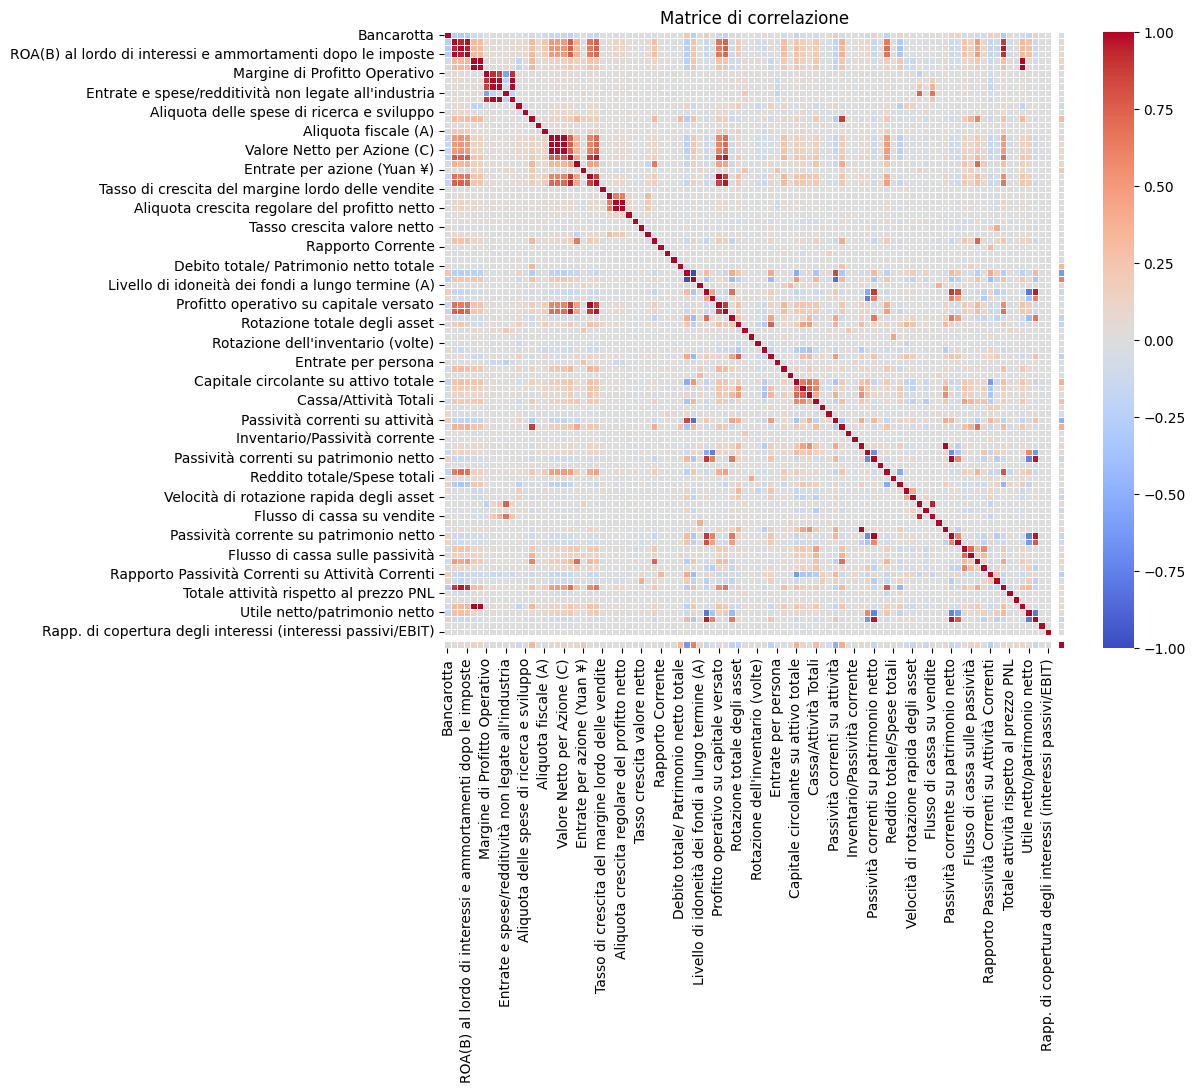

In [356]:
# Matrice di Correlazione
correlation_matrix = data.corr()
correlation_matrix

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice di correlazione')
plt.show()


In [357]:
df[df['Bancarotta'] == 1].shape

(220, 35)

In [358]:
df_zeros = df[df['Bancarotta'] == 0]
df_ones = df[df['Bancarotta'] == 1]
n_desired_ones = 450
df_zeros = df_zeros.sample(n_desired_ones, random_state=42)
df_unbalanced = pd.concat([df_zeros, df_ones])
df_unbalanced

,ROA(B) al lordo di interessi e ammortamenti dopo le imposte,Margine Lordo Operativo,Tasso di interesse netto dopo le tasse,Tasso di Spesa Operativa,Aliquota delle spese di ricerca e sviluppo,Tasso di flusso di cassa,Aliquota degli interessi sul debito,Aliquota fiscale (A),Valore Netto per Azione (A),EPS persistente nelle ultime quattro stagioni,...,Correnti Passività/Passivo,Capitale circolante/patrimonio netto,Debito a lungo termine su attività correnti,Riserve utili su attivo totale,Indice di Rotazione dell'Attivo Corrente,Passività corrente su patrimonio netto,Redditività sull'Attivo Totale (NITA),Grado di leva finanziaria (DFL),Capitale proprio/Passività,Bancarotta
2236,0.524,0.608,0.809,0.000,0.000,0.461,0.000,0.135,0.175,0.218,...,0.994,0.740,0.000,0.937,0.001,0.335,0.801,0.027,0.024,0
5538,0.559,0.612,0.809,0.000,4640000000.000,0.473,0.000,0.193,0.209,0.229,...,0.319,0.735,0.021,0.936,0.000,0.327,0.809,0.027,0.043,0
4593,0.557,0.606,0.809,0.000,543000000.000,0.467,0.000,0.150,0.171,0.219,...,0.804,0.737,0.002,0.935,0.000,0.328,0.807,0.027,0.057,0
6315,0.503,0.598,0.809,7420000000.000,1340000000.000,0.461,0.000,0.000,0.159,0.207,...,0.827,0.728,0.006,0.923,797000000.000,0.336,0.772,0.027,0.020,0
4205,0.596,0.614,0.809,0.000,5450000000.000,0.468,0.000,0.000,0.185,0.246,...,0.782,0.741,0.003,0.945,0.000,0.331,0.837,0.027,0.028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,0.461,0.613,0.809,0.000,0.000,0.460,0.001,0.000,0.139,0.198,...,0.939,0.734,0.000,0.874,0.000,0.347,0.726,0.027,0.016,1
6640,0.221,0.598,0.808,0.000,1880000000.000,0.473,0.000,0.000,0.070,0.080,...,0.295,0.733,0.038,0.778,0.000,0.320,0.519,0.027,0.004,1
6641,0.378,0.591,0.809,5530000000.000,0.000,0.465,0.000,0.000,0.131,0.165,...,0.858,0.728,0.005,0.853,7290000000.000,0.391,0.558,0.027,0.012,1
6642,0.380,0.581,0.808,0.000,0.000,0.458,0.000,0.000,0.132,0.154,...,0.596,0.719,0.025,0.879,0.000,0.372,0.642,0.027,0.012,1


In [359]:
for i in df_unbalanced.columns:
    print(i)

ROA(B) al lordo di interessi e ammortamenti dopo le imposte
Margine Lordo Operativo
Tasso di interesse netto dopo le tasse
Tasso di Spesa Operativa
Aliquota delle spese di ricerca e sviluppo
Tasso di flusso di cassa
Aliquota degli interessi sul debito
Aliquota fiscale (A)
Valore Netto per Azione (A)
EPS persistente nelle ultime quattro stagioni
Flusso di cassa per azione
Tasso di crescita dell'utile operativo
Tasso crescita valore netto
Percentuale di reinvestimento del contante
Debito totale/ Patrimonio netto totale
Rapporto debito %
Patrimonio netto/Attività
Livello di idoneità dei fondi a lungo termine (A)
Indebitamento da prestiti
Crediti in sospeso/Patrimonio netto
Profitto operativo su capitale versato
Inventario e crediti commerciali/Valore netto
Rotazione totale degli asset
Profitto operativo per persona
Passività correnti su attività
Correnti Passività/Passivo
Capitale circolante/patrimonio netto
Debito a lungo termine su attività correnti
Riserve utili su attivo totale
Indice

In [360]:
df_unbalanced = standard_OHE(df_unbalanced, drop_first=True)
df_unbalanced.shape

(670, 35)

In [361]:
# Divisione Train e Test sets
x = df_unbalanced.drop(['Bancarotta'],axis=1)
y = df_unbalanced['Bancarotta']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


(536, 34)
(134, 34)


In [362]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    """
    Calculate VIF
    """
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif

vif = calculate_vif(X_train)
print(vif)

                                             Variable        VIF
0                           Patrimonio netto/Attività 257969.865
1                                   Rapporto debito %   7799.665
2              Passività corrente su patrimonio netto     91.646
3                Capitale circolante/patrimonio netto     84.868
4                      Passività correnti su attività     32.875
5               Redditività sull'Attivo Totale (NITA)     20.224
6       Inventario e crediti commerciali/Valore netto     17.058
7                           Indebitamento da prestiti     16.911
8   ROA(B) al lordo di interessi e ammortamenti do...     15.158
9       EPS persistente nelle ultime quattro stagioni     13.386
10                Crediti in sospeso/Patrimonio netto     13.158
11             Debito totale/ Patrimonio netto totale      8.956
12                         Correnti Passività/Passivo      7.601
13                     Riserve utili su attivo totale      6.212
14             Profitto o

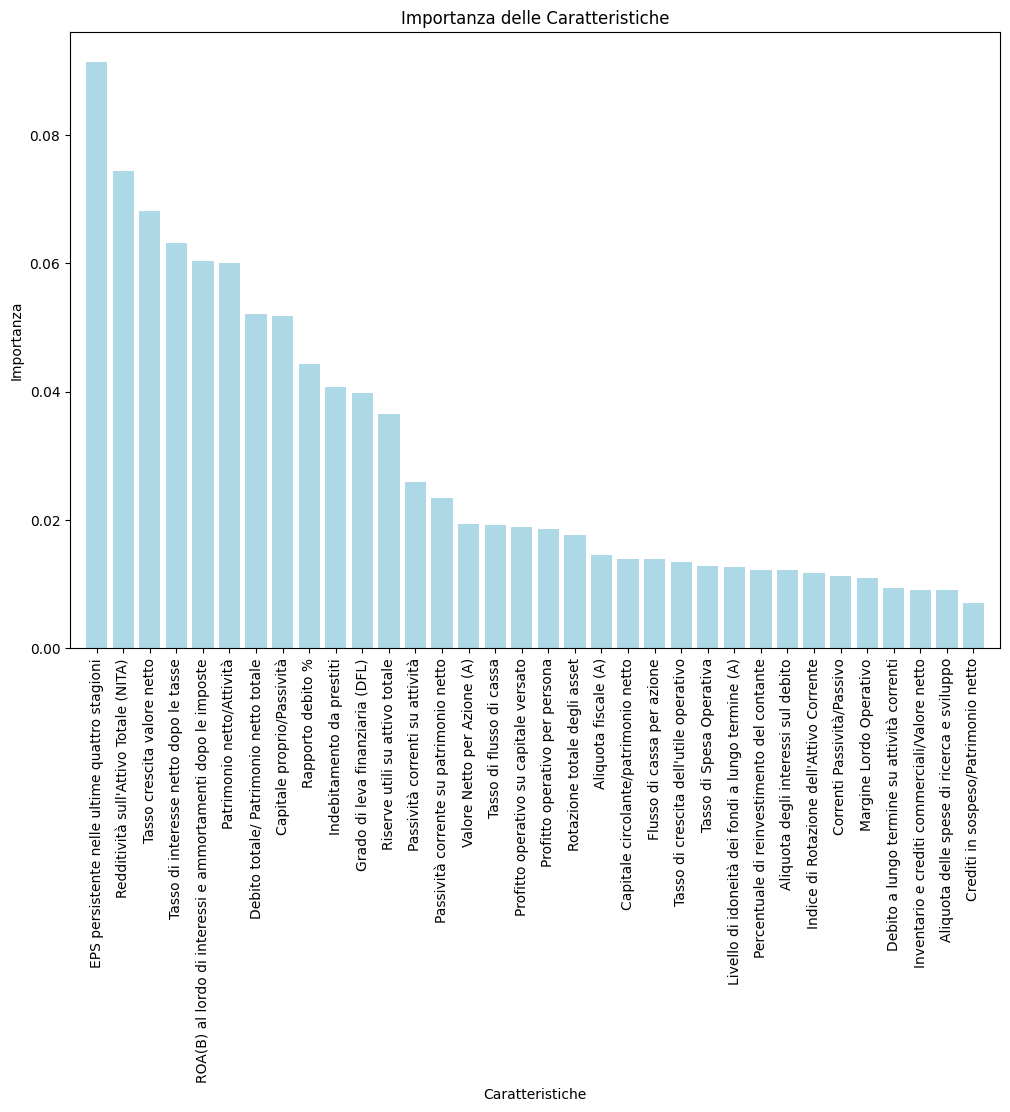

Score with selected features: 0.8258706467661692


In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assumiamo che 'X' e 'y' siano il tuo DataFrame delle caratteristiche e il vettore target, rispettivamente

# Carica i tuoi dati
# X = le tue variabili indipendenti (pandas DataFrame)
# y = la tua variabile dipendente (target della classificazione, pandas Series o numpy array)

# Dividi i dati in set di training e test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Inizializza il modello di Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestra il modello
rf.fit(X_train, y_train)

# Ottieni l'importanza delle variabili
importances = rf.feature_importances_

# Ordina le variabili per importanza
indices = np.argsort(importances)[::-1]

# Visualizza l'importanza delle variabili
plt.figure(figsize=(12, 8))
plt.title('Importanza delle Caratteristiche')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Caratteristiche')
plt.ylabel('Importanza')
plt.show()

# Scegli le variabili con una soglia di importanza
threshold = 0.01  # Soglia dell'importanza
selected_features = X_train.columns[importances > threshold]

# Riaddestra il modello con le variabili selezionate
rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train[selected_features], y_train)

# Valuta il modello ridotto
y_pred = rf_reduced.predict(X_test[selected_features])
reduced_score = accuracy_score(y_test, y_pred)
print("Score with selected features:", reduced_score)


In [364]:
len(selected_features)

30

In [365]:
# Count features with high VIF
vif_threshold = 5
features_to_remove = vif[vif['VIF'] > vif_threshold]['Variable']

# Remove features with VIF > 5
X_train_uncorr = X_train.drop(columns=features_to_remove)

vif = calculate_vif(X_train_uncorr)
print(vif)
print("Features removed:", features_to_remove.shape[0])
print("Remaining features:", X_train_uncorr.shape[1])


                                             Variable       VIF
0              Tasso di crescita dell'utile operativo 25372.801
1              Tasso di interesse netto dopo le tasse 25099.638
2                             Margine Lordo Operativo  2676.029
3                          Flusso di cassa per azione  1509.518
4                            Tasso di flusso di cassa  1103.429
5          Percentuale di reinvestimento del contante   357.712
6                      Profitto operativo per persona   289.947
7                         Valore Netto per Azione (A)    60.689
8                        Rotazione totale degli asset     3.554
9                          Capitale proprio/Passività     2.853
10                    Grado di leva finanziaria (DFL)     2.203
11  Livello di idoneità dei fondi a lungo termine (A)     1.737
12         Aliquota delle spese di ricerca e sviluppo     1.600
13                           Tasso di Spesa Operativa     1.592
14                               Aliquot

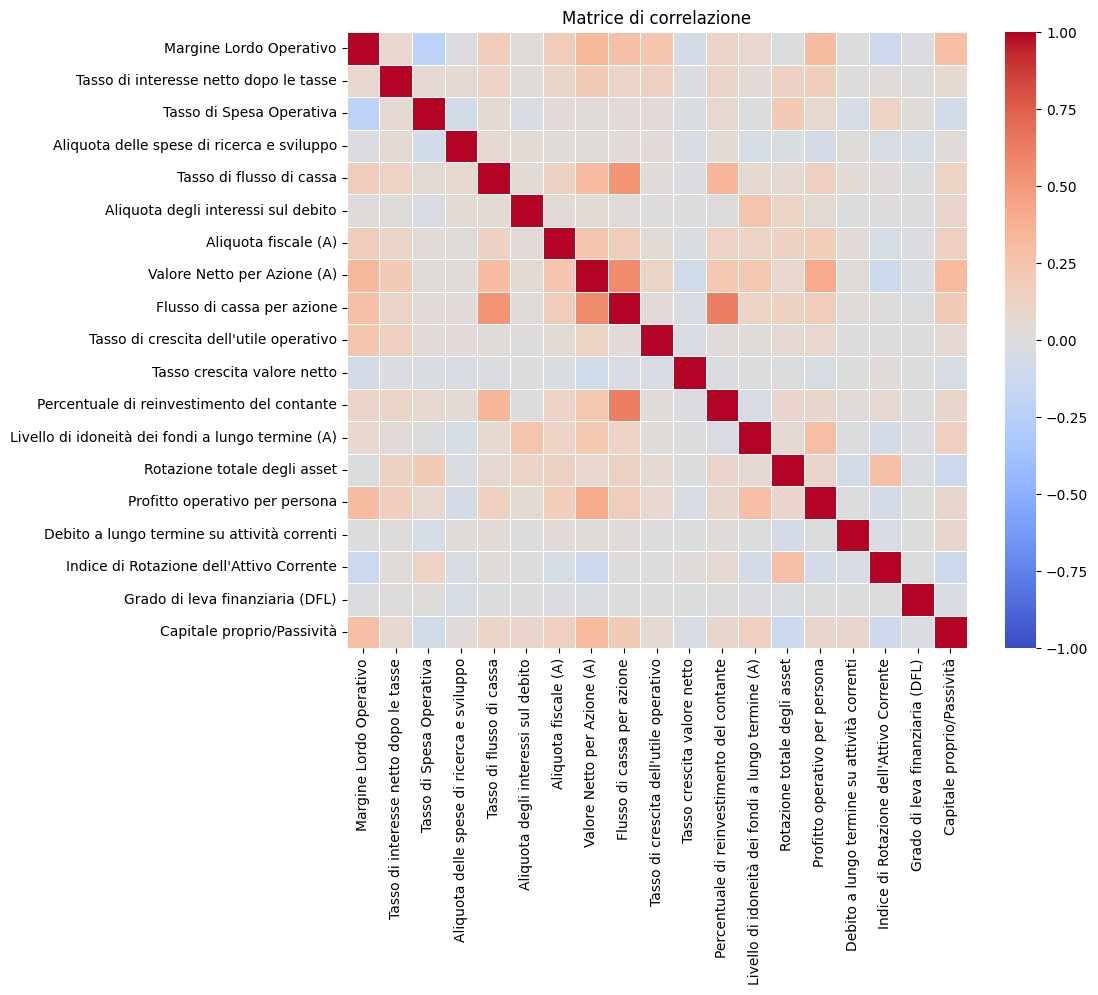

In [366]:
correlation_matrix = X_train_uncorr.corr()

#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice di correlazione')
plt.show()

In [367]:
def balance_with_SMOTE(x_train, y_train):
    """
    Balances the dataset using the Synthetic Minority Over-sampling Technique (SMOTE).
    """
    smote = SMOTE()
    x_train, y_train = smote.fit_resample(x_train, y_train)
    return x_train, y_train

vals_before_smote = y_train.value_counts()
vals_before_smote


Bancarotta
0    315
1    154
Name: count, dtype: int64

In [368]:
# sovradimensionamento del dataset
X_train_SMOTE, y_train_SMOTE = balance_with_SMOTE(x_train=X_train_uncorr, y_train=y_train)

In [369]:
vals_after_smote = y_train_SMOTE.value_counts()
vals_after_smote

Bancarotta
0    315
1    315
Name: count, dtype: int64

In [370]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_SMOTE, y_train_SMOTE)
y_train_pred = model.predict(X_train_SMOTE)

# Calcola accuracy
accuracy = accuracy_score(y_train_pred, y_train_SMOTE)
print("Accuracy:", accuracy)

Accuracy: 0.4603174603174603


In [371]:
def rfe_selection(X, y, k):
    model = LogisticRegression(max_iter=10000)
    rfe = RFE(model, n_features_to_select=k)
    rfe = rfe.fit(X, y)
    selected_features = X.columns[rfe.get_support(indices=True)]
    return X[selected_features]

In [372]:
def skb_selection(X, y, k):
    skb = SelectKBest(score_func=f_classif, k = k)
    skb = skb.fit(X, y)
    selected_features = X.columns[skb.get_support(indices=True)]
    return X[selected_features]

In [373]:
# ciclo rfe
accuracies_rfe = []
rfe_selections = {}

for k in tqdm(range(1,len(X_train_SMOTE.columns)+1)):
    
    # selezioniamo le k variabili
    x_selected = rfe_selection(X=X_train_SMOTE, y=y_train_SMOTE, k=k)

    # Store the selected features
    rfe_selections[k] = x_selected.columns

    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(x_selected)

    # facciamo un fitting del modello
    model = sm.Logit(y_train_SMOTE.to_numpy(),X_train_w_intercept).fit(disp=False)

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)

    # trasformiamo le probanilità in valori binari 
    y_pred = (y_pred > 0.5).astype(int)

    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train_SMOTE, y_pred)
    print(f"Accuracy with {k} features: {accuracy}")

    # lo aggiungiamo alla lista 
    accuracies_rfe.append(accuracy)
    print(accuracy)



 11%|█         | 2/19 [00:00<00:02,  7.00it/s]

Accuracy with 1 features: 0.5031746031746032
0.5031746031746032
Accuracy with 2 features: 0.5079365079365079
0.5079365079365079


 21%|██        | 4/19 [00:00<00:01,  7.94it/s]

Accuracy with 3 features: 0.5158730158730159
0.5158730158730159
Accuracy with 4 features: 0.5349206349206349
0.5349206349206349


 37%|███▋      | 7/19 [00:00<00:01,  9.42it/s]

Accuracy with 5 features: 0.5555555555555556
0.5555555555555556
Accuracy with 6 features: 0.5396825396825397
0.5396825396825397
Accuracy with 7 features: 0.7253968253968254
0.7253968253968254


 47%|████▋     | 9/19 [00:00<00:00, 10.34it/s]

Accuracy with 8 features: 0.7523809523809524
0.7523809523809524
Accuracy with 9 features: 0.8174603174603174
0.8174603174603174
Accuracy with 10 features: 0.8269841269841269
0.8269841269841269


 68%|██████▊   | 13/19 [00:01<00:00, 12.67it/s]

Accuracy with 11 features: 0.8301587301587302
0.8301587301587302
Accuracy with 12 features: 0.8396825396825397
0.8396825396825397
Accuracy with 13 features: 0.8761904761904762
0.8761904761904762
Accuracy with 14 features: 0.8809523809523809
0.8809523809523809


 89%|████████▉ | 17/19 [00:01<00:00, 15.44it/s]

Accuracy with 15 features: 0.8904761904761904
0.8904761904761904
Accuracy with 16 features: 0.8888888888888888
0.8888888888888888
Accuracy with 17 features: 0.8857142857142857
0.8857142857142857
Accuracy with 18 features: 0.8857142857142857
0.8857142857142857


100%|██████████| 19/19 [00:01<00:00, 11.98it/s]

Accuracy with 19 features: 0.8873015873015873
0.8873015873015873


In [374]:
k_rfe = 13

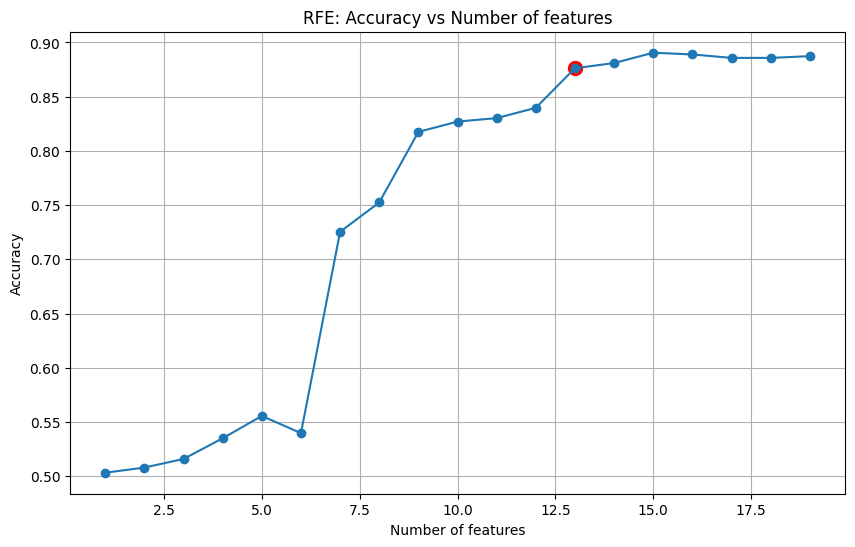

In [375]:
# Plot accuracies
plt.figure(figsize=(10, 6))
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_rfe, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('RFE: Accuracy vs Number of features')
plt.grid()
plt.show()


In [376]:
# ciclo skb
accuracies_skb = []
skb_selections = {}

for k in tqdm(range(1,len(X_train_SMOTE.columns)+1)):
    
    # selezioniamo le k variabili
    x_selected = skb_selection(X=X_train_SMOTE, y=y_train_SMOTE, k=k)

    # Store the selected features
    skb_selections[k] = x_selected.columns

    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(x_selected)

    try:

        # facciamo un fitting del modello
        model = sm.Logit(y_train_SMOTE.to_numpy(),X_train_w_intercept).fit(disp=False)

        # prevediamo le probabilità
        y_pred = model.predict(X_train_w_intercept)

        # trasformiamo le probanilità in valori binari 
        y_pred = (y_pred > 0.5).astype(int)

        # calcoliamo l'accuracy del modello
        accuracy = metrics.accuracy_score(y_train_SMOTE, y_pred)
    
    except:
        print("Model did not converge")
        
    # lo aggiungiamo alla lista 
    accuracies_skb.append(accuracy)



100%|██████████| 19/19 [00:00<00:00, 39.26it/s]


In [377]:
k_skb = 7

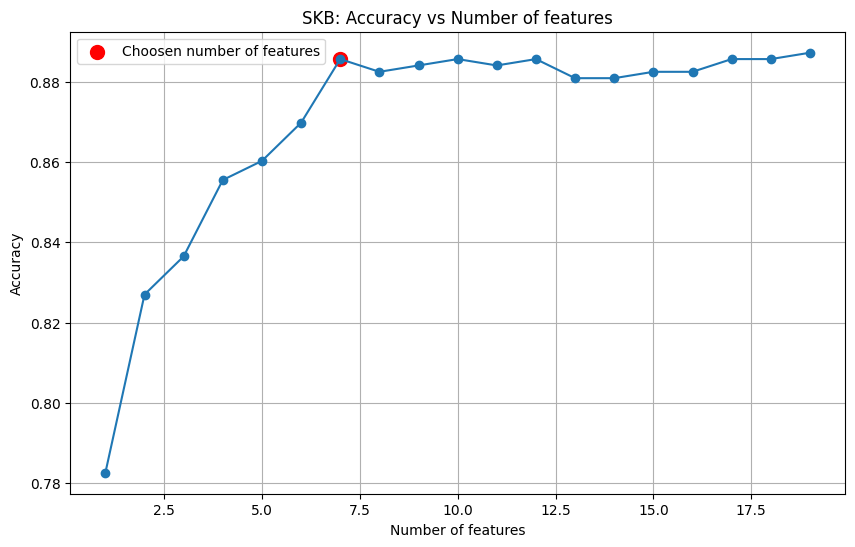

In [378]:
# Plot accuracies
plt.figure(figsize=(10, 6))
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_skb, marker='o' )
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('SKB: Accuracy vs Number of features')
plt.grid()
plt.show()


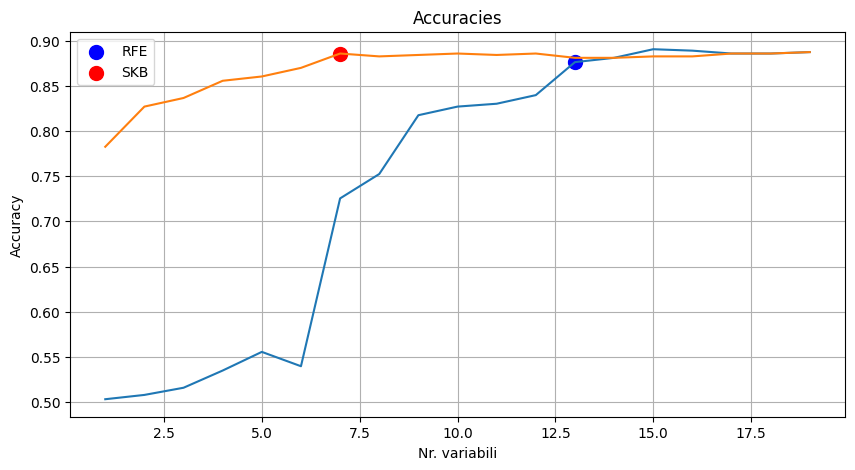

In [379]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_rfe)
plt.plot(range(1, len(X_train_SMOTE.columns)+1), accuracies_skb)
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='blue', label='RFE', s=100)
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='red', label='SKB', s=100)
plt.title('Accuracies') 
plt.xlabel('Nr. variabili')
plt.ylabel('Accuracy')
plt.grid()
plt.legend() 
plt.show()

In [380]:
# Select the best features for RFE and SKB
X_train_skb = X_train_SMOTE[skb_selections[k_skb]]
X_train_rfe = X_train_SMOTE[rfe_selections[k_rfe]]

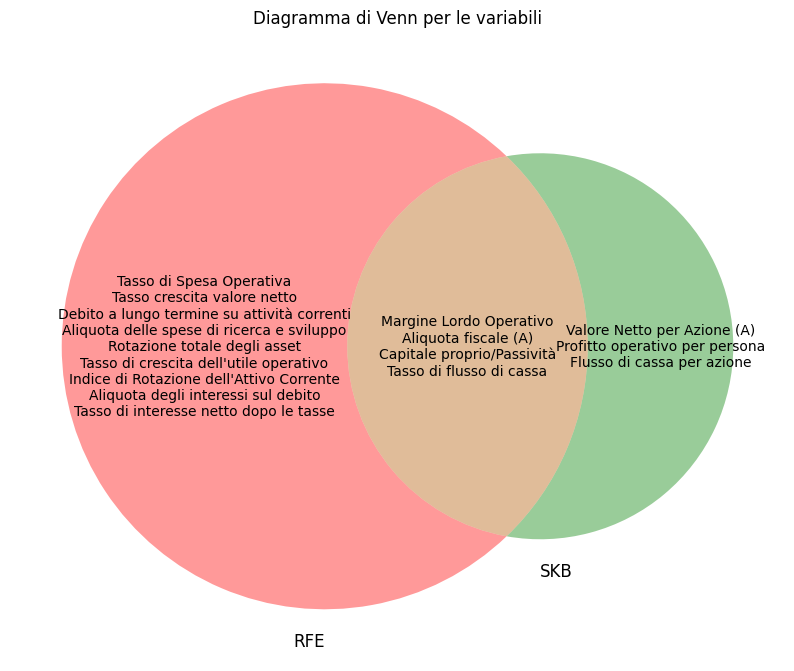

In [381]:
rfe_cols = list(X_train_rfe.columns)
skb_cols = list(X_train_skb.columns)

set1 = set(rfe_cols)
set2 = set(skb_cols)

# Crea il diagramma di Venn
plt.figure(figsize=(10, 10))
venn_diagram = venn2([set1, set2], ('RFE', 'SKB'))

# Assegna i nomi delle parole alle etichette nelle aree corrispondenti del diagramma di Venn
venn_diagram.get_label_by_id('10').set_text('\n'.join(set1 - set2))
venn_diagram.get_label_by_id('11').set_text('\n'.join(set1 & set2))
venn_diagram.get_label_by_id('01').set_text('\n'.join(set2 - set1))

# Mostra il grafico
plt.title("Diagramma di Venn per le variabili")
plt.show()

In [382]:
# LOOCV
def loocv(X, y):
    model = LogisticRegression(max_iter=100000, solver="newton-cholesky")
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
    return scores.mean()

In [383]:
# LOOCV rfe
accuracy_rfe = loocv(X_train_rfe, y_train_SMOTE)
print(f"Accuracy with RFE: {accuracy_rfe}")

# LOOCV skb
accuracy_skb = loocv(X_train_skb, y_train_SMOTE)
print(f"Accuracy with SKB: {accuracy_skb}")



Accuracy with RFE: 0.4603174603174603
Accuracy with SKB: 0.7603174603174603


In [385]:
def sel_logistic_regression(X, y):

    # Select the choosen features with SelectKBest
    x_selected = X[skb_selections[k_skb]]
    X_train_w_intercept = sm.add_constant(x_selected)

    # Fit the model
    model = sm.Logit(y.to_numpy(),X_train_w_intercept).fit(disp=False)

    # Predict probabilities
    y_pred = model.predict(X_train_w_intercept)

    # Transform probabilities to binary values
    y_pred = (y_pred > 0.5).astype(int)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(y, y_pred)
    return model, accuracy

model, accuracy = sel_logistic_regression(X_test, y_test)
print(accuracy)

0.8308457711442786
